# Project 2

## Name: Sierra Costanza

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [28]:
#Read in data from source 
df_raw = pd.read_csv("admissions.csv")
print df_raw.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [21]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 400

#### Question 2. Create a summary table

In [11]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


Due to missing values in GRE, GPA and Prestige, the quantiles are not able to be computed

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: there is a larger range for the possible values of GRE

#### Question 4. Drop data points with missing data


In [5]:
df_new=df_raw.dropna(axis=0)
df_new.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

In [7]:
df_new.apply(lambda x: sum(pd.isnull(x)))

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: Taking a sum of the missing values in each column according to the code above yields that no column has any missing values

#### Question 6. Create box plots for GRE and GPA

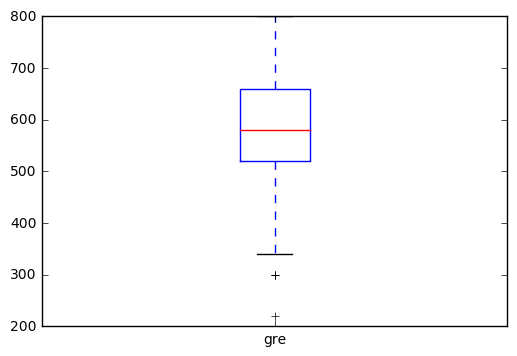

In [8]:
#boxplot 1
df_new['gre'].plot(kind="box")

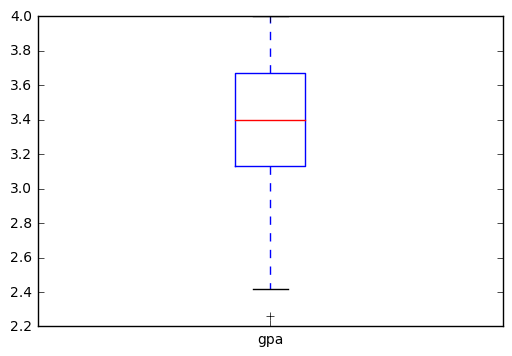

In [9]:
#boxplot 2 
df_new['gpa'].plot(kind="box")

#### Question 7. What do this plots show?

Answer: They show how the values of GRE and GPA are distributed - the middle 50% of GRE values are between around 520 and 660, and there are a couple of outliers on the low end (1 around 300, 1 around 200). The middle 50% of GPA values are between around 3.1 and 3.7, and it looks like there is an outlier on the low end around 2.3.

#### Question 8. Describe each distribution 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EAC0438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000ED8FA58>]], dtype=object)

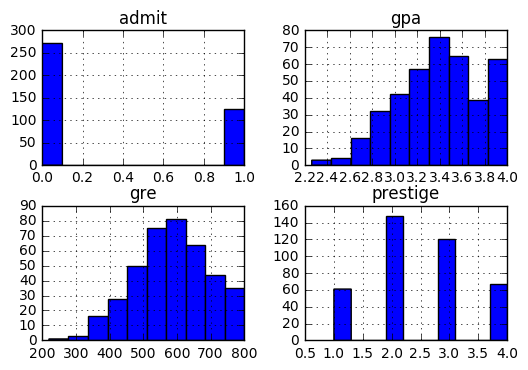

In [32]:
# plot the distribution of each variable 
df_new.hist()

For Admit (categorical variable), there are about twice as many 0s (no admit) as 1s (admit). GPA looks skewed left and not exactly normal (also looks a bit irregular on the right side). GRE is also skewed left but with the removal of outliers on the left, would look approximately normal. Prestige is categorical with 2 as the mode, 3 as the next most frequent value followed by 1 and 4 with about the same frequencies. If treated as continuous, Prestige would look approximately normal.

#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: Since GPA and GRE are both skewed, we would not meet that requirement 

#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: Yes, since both GPA and GRE are skewed left. I would start by removing outliers for both variables, and then for GPA (the least normal out of the two) I would try applying a transformation

#### Question 11. Which of our variables are potentially colinear? 

In [33]:
# create a correlation matrix for the data
df_new.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### Question 12. What did you find?

Answer: The variables are weakly correlated with one another. GRE and GPA are the most correlated (positively) with a coefficient of 0.38 - but this is not a level of correlation large enough to be concerned about when building a regression model. The next most correlated variables are prestige and the outcome variable admit with a correlation coefficient of -0.24, but this also is not a point of concern for building a model.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: For each level of Prestige (1, 2, 3, 4), I would look at the admissions rates which are just the proportion of Admit=1s. I would also look at the distribution of Prestige (frequency proportions) along each Admit level (0 and 1). I.e., for Admit=0, look at how the values of Prestige distribute compared to the Prestige distribution for Admit=1. Code and result for this is below Question 14.

#### Question 14. What is your hypothesis? 

Answer: The higher the prestige of an undergraduate school (in this instance, 'high' starts at 1), the higher the grad school admissions rates will be.

In [14]:
print pd.crosstab(df_new['prestige'], df_new['admit'], rownames=['prestige'],normalize='index')

admit            0         1
prestige                    
1.0       0.459016  0.540984
2.0       0.641892  0.358108
3.0       0.768595  0.231405
4.0       0.820896  0.179104


In [17]:
print pd.crosstab(df_new['admit'], df_new['prestige'], rownames=['admit'],normalize='index')

prestige       1.0       2.0       3.0       4.0
admit                                           
0         0.103321  0.350554  0.343173  0.202952
1         0.261905  0.420635  0.222222  0.095238


## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

We will replace the missing data with the medians of each column:

In [22]:
df_raw.fillna(df_raw.median()).describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.00000
mean,0.317500,588.000000,3.390950,2.48500
std,0.466087,115.339751,0.379675,0.94446
min,0.000000,220.000000,2.260000,1.00000
25%,0.000000,520.000000,3.130000,2.00000
50%,0.000000,580.000000,3.395000,2.00000
75%,1.000000,660.000000,3.670000,3.00000
max,1.000000,800.000000,4.000000,4.00000


Now we'll try the means, and see how the distributions change:

In [23]:
df_raw.fillna(df_raw.mean()).describe()

,admit,gre,gpa,prestige
count,400.000000,400.000000,400.000000,400.000000
mean,0.317500,588.040201,3.390930,2.486216
std,0.466087,115.338353,0.379675,0.944147
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.390930,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


Not much changes since there are so few missing values (the means increase ever so slightly for GRE and Prestige)

#### 2. Bonus: Log transform the skewed data

We will transform GPA. Since it's left skewed, we will use a positive power:

In [29]:
df_raw['gpa']=np.power(df_raw.gpa,2)

Now look at the distributions:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCDE1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000DD11518>]], dtype=object)

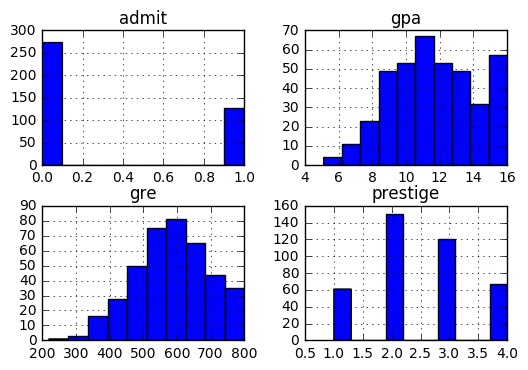

In [30]:
df_raw.hist()

GPA still looks skewed on the right side, so further transformations may be needed; however, it does look more normal

#### 3. Advanced: Impute missing data